In [1]:
import numpy as np
import random
from numpy import linalg as LA
from scipy.spatial import distance
import pylab as pl

In [2]:
# Problem Initial Requirement
# Generate 2 sets of 2-D Gaussian random data, each set containing 500 samples using parameters below:

cov1 = [[0.9, 0.4], [0.4, 0.9]]
mean1 = (1, 0)
cov2 = [[0.9, 0.4], [0.4, 0.9]]
mean2 = (0, 1.5)

In [3]:
dataset1 = np.random.multivariate_normal(mean1, cov1, 500)
dataset2 = np.random.multivariate_normal(mean2, cov2, 500)

In [4]:
dataset = np.concatenate((dataset1,dataset2),axis=0)
print(len(dataset))

1000


In [5]:
# Problem 1.1
    #Write a function cluster = mykmeans(X, k, c) that clusters data X into k clusters. The c here is the initial centers.

def mykmeans(X, k, c=[]):
    print(len(X))
    #print(len(c))
    if (len(c)!=0):
        centroids = c
    else:
        centroids = random.sample(list(X), k)
    
    flag = True
    loop = 0
    while(flag):
        clusters = {}
        loop+=1
        #print("Initial Centroids")
        #for a in centroids:
        #    print(a)
        #print("\n")
        for i in range(int(k)):
            clusters[i] = []
        #dist = np.linalg.norm(x[0]-centroids[0])
        #print(dist)
        #st = distance.euclidean(x[0], centroids[0])
        #print(st)

        for a in X:
            #print(type(a))
            distances = [np.sqrt(np.sum(np.square(a-j))) for j in centroids] #dist between data and centroids
            clusterIndex = distances.index(min(distances))
            clusters[clusterIndex].append(a.tolist())

        #print(clusters[0])
        previous = list(centroids) #copying previous centroids
        #print("Old centroids ",previous)
        #print("\n")
        for i in clusters:
            centroids[i] = (np.average(clusters[i],axis=0)).tolist() #taking mean
        #print("New centroids ",centroids)
        #print("\n")
        
        for c in range(int(k)):
            
            #print("Old centroids ",previous)
            original_centroid = previous[c]
            #print(original_centroid)
            #print("previous ",original_centroid)
            #print("\n")
            current_centroid = centroids[c]
            #print(current_centroid)
            #print("current",current_centroid)
            #print("\n")
            
            distanceNew = [np.sqrt(np.sum(np.square(original_centroid-np.asarray(current_centroid))))]
            for a in distanceNew:
                if(a <= 0.001 or loop == 10000):
                    flag = False
                else:
                    flag = True
            #print("--",distanceNew)
    
        
        
    print(loop)
    
    return (clusters,loop,centroids)

1000
21


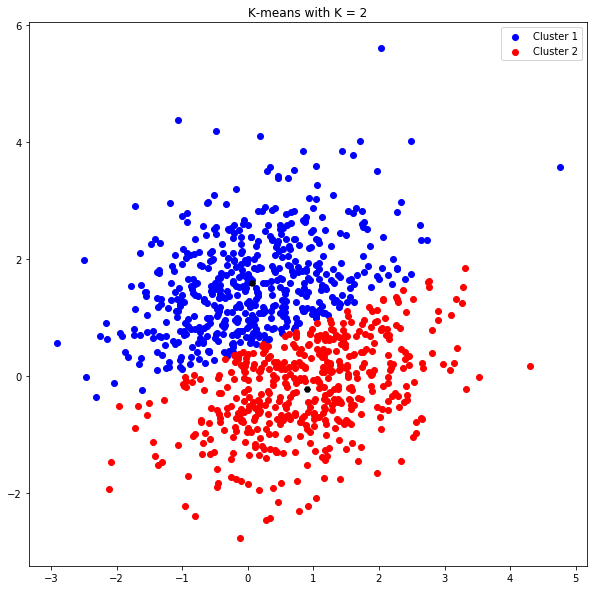

In [6]:
# Problem 1.2
# Apply code to the data generated above with k = 2 and initial centers c1 = (10; 10) and c2 = (-10; -10).

cluster12 = mykmeans(dataset,2,[(10,10),(-10,-10)])
#centers = cluster12.cluster_centers_

pl.figure(figsize=(10,10))

for key in cluster12[0]:
    for b in cluster12[0][key]:
        if key == 0:
            c1 = pl.scatter(b[0],b[1],c='b',marker='o')
        else:
            c2 = pl.scatter(b[0],b[1],c='r',marker='o')

pl.scatter(cluster12[2][0][0],cluster12[2][0][1],c='black',marker='H')
pl.scatter(cluster12[2][1][0],cluster12[2][1][1],c='black',marker='H')        
pl.legend([c1, c2], ['Cluster 1', 'Cluster 2'])
pl.title('K-means with K = 2')
pl.show()


1000
8


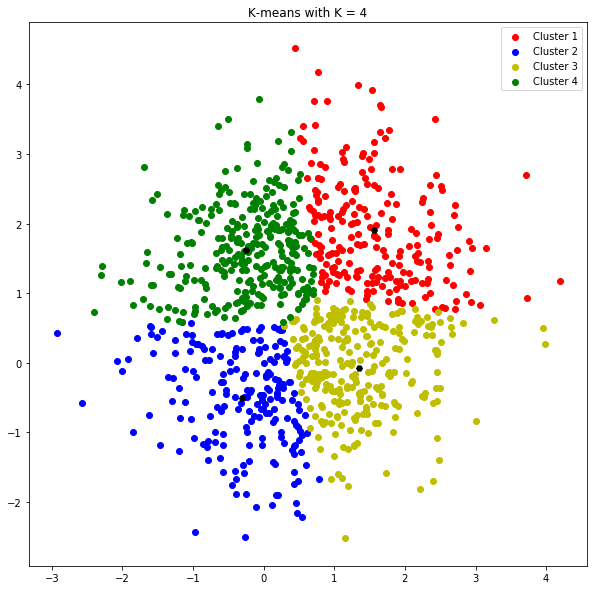

In [7]:
# Problem 1.3
# Apply code to the data generated above with k = 4 and initial centers 
# c1 = (10; 10), c2 = (-10; -10), c3 = (10; -10) and c4 = (-10; 10).

cluster13 = mykmeans(dataset,4,[(10,10),(-10,-10),(10,-10),(-10,10)])

pl.figure(figsize=(10,10))

for key in cluster13[0]:
    for b in cluster13[0][key]:
        if key == 0:
            c1 = pl.scatter(b[0],b[1],c='r',marker='o')
        elif key == 1:
            c2 = pl.scatter(b[0],b[1],c='b',marker='o')
        elif key == 2:
            c3 = pl.scatter(b[0],b[1],c='y',marker='o')
        else:
            c4 = pl.scatter(b[0],b[1],c='g',marker='o')

pl.scatter(cluster13[2][0][0],cluster13[2][0][1],c='black',marker='H')
pl.scatter(cluster13[2][1][0],cluster13[2][1][1],c='black',marker='H')
pl.scatter(cluster13[2][2][0],cluster13[2][2][1],c='black',marker='H')
pl.scatter(cluster13[2][3][0],cluster13[2][3][1],c='black',marker='H')
pl.legend([c1, c2, c3, c4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])
pl.title('K-means with K = 4')
pl.show()